<a href="https://colab.research.google.com/github/jcjimenezb123/MetodosNumericosPython/blob/master/01Interpolacion_coefs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
from scipy.interpolate import CubicSpline,lagrange
import matplotlib.pyplot as plt

In [14]:
x = np.linspace(-2, 2, 11)
y_or = x**3+2*x**2+x+1
perturbacion = np.random.normal(0, 1, len(x))  # Perturbación aleatoria (mean,std,size)
y = y_or + perturbacion

In [15]:
lag = lagrange(x, y)
xi = 1.5
yi = lag(xi)
print(lag)
print(lag.c)

        10        9        8         7         6         5         4
-2.121 x  - 1.06 x + 17.9 x + 8.717 x - 49.46 x - 23.21 x + 51.56 x
          3         2
 + 23.86 x - 15.33 x - 5.608 x + 1.816
[ -2.12122212  -1.06016841  17.90091662   8.71695633 -49.46494087
 -23.20558684  51.55793445  23.85652402 -15.32716365  -5.60845255
   1.81642205]


In [16]:
sc = CubicSpline(x, y)
xi = 1.5
yi = sc(xi)
print(sc.c.T)

[[-1.90946404e+00  5.91706294e+00 -3.36818887e+00  1.61011243e-01]
 [-1.90946404e+00  3.62570608e+00  4.48918739e-01 -3.61739933e-01]
 [-5.28472978e+00  1.33434923e+00  2.43294087e+00  2.75734837e-01]
 [ 1.13208182e+01 -5.00732650e+00  9.63749958e-01  1.12418435e+00]
 [-3.04031225e+01  8.57765529e+00  2.39188147e+00  1.43304446e+00]
 [ 6.77660130e+01 -2.79060917e+01 -5.33949311e+00  1.81642205e+00]
 [-8.28250860e+01  5.34131238e+01  4.86331973e+00 -4.47325035e-01]
 [ 7.47506467e+01 -4.59769793e+01  7.83777753e+00  4.74329717e+00]
 [-3.63987737e+01  4.37237967e+01  6.93650449e+00  5.30613288e+00]
 [-3.63987737e+01  4.52683482e-02  2.44441305e+01  1.27470206e+01]]


In [17]:
# Coeficientes de los polinomios por intervalo
coefs = sc.c  # Matriz con [d_i, c_i, b_i, a_i] por intervalo

# Mostrar coeficientes
for i in range(len(x) - 1):
    print(f"Intervalo [{x[i]}, {x[i+1]}]:")
    #El coeficiente 𝑎 es el valor de 𝑦 en el nodo izquierdo del intervalo.
    #Los coeficientes 𝑏,𝑐,𝑑 se calculan para garantizar la suavidad en las derivadas y la continuidad en los intervalos.
    d = coefs[0, i]
    c = coefs[1, i]
    b = coefs[2, i]
    a = coefs[3, i]
    print(f'y = {a:e} + {b:e}*(x-{x[i]}) + {c:e}*(x-{x[i]})**2 + {d:e}*(x-{x[i]})**3')
    if x[i]<=xi<=x[i+1]:
      yii = a + b*(xi-x[i]) + c*(xi-x[i])**2 + d*(xi-x[i])**3
      print(f"xi = {xi},    yii = {yii} [{yi}]")

Intervalo [-2.0, -1.6]:
y = 1.610112e-01 + -3.368189e+00*(x--2.0) + 5.917063e+00*(x--2.0)**2 + -1.909464e+00*(x--2.0)**3
Intervalo [-1.6, -1.2]:
y = -3.617399e-01 + 4.489187e-01*(x--1.6) + 3.625706e+00*(x--1.6)**2 + -1.909464e+00*(x--1.6)**3
Intervalo [-1.2, -0.7999999999999998]:
y = 2.757348e-01 + 2.432941e+00*(x--1.2) + 1.334349e+00*(x--1.2)**2 + -5.284730e+00*(x--1.2)**3
Intervalo [-0.7999999999999998, -0.3999999999999999]:
y = 1.124184e+00 + 9.637500e-01*(x--0.7999999999999998) + -5.007327e+00*(x--0.7999999999999998)**2 + 1.132082e+01*(x--0.7999999999999998)**3
Intervalo [-0.3999999999999999, 0.0]:
y = 1.433044e+00 + 2.391881e+00*(x--0.3999999999999999) + 8.577655e+00*(x--0.3999999999999999)**2 + -3.040312e+01*(x--0.3999999999999999)**3
Intervalo [0.0, 0.40000000000000036]:
y = 1.816422e+00 + -5.339493e+00*(x-0.0) + -2.790609e+01*(x-0.0)**2 + 6.776601e+01*(x-0.0)**3
Intervalo [0.40000000000000036, 0.8000000000000003]:
y = -4.473250e-01 + 4.863320e+00*(x-0.40000000000000036) + 5.341

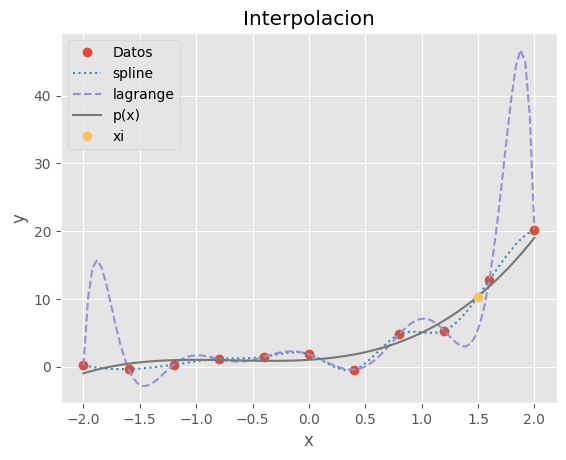

In [18]:
xs = np.linspace(x.min(),x.max(),100)
plt.style.use('ggplot')#('seaborn-v0_8-dark-palette')
plt.plot(x, y, 'o',label='Datos')
plt.plot(xs, sc(xs), ':',label='spline')
plt.plot(xs, lag(xs), '--',label='lagrange')
plt.plot(xs, p(xs), '-',label='p(x)')
plt.plot(xi, yi, 'o',label='xi')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolacion')
#plt.grid()
plt.show()